[[-2.49732395  0.06034895  2.83509781]
 [-2.15233496  0.08101203  2.90270917]
 [-2.06504881  0.0809841   2.91616518]
 ...
 [ 0.86097698  0.94588211 -2.79592969]
 [ 0.81263417  1.13553809 -2.70108547]
 [ 1.16183871  1.27625193 -2.34625745]]


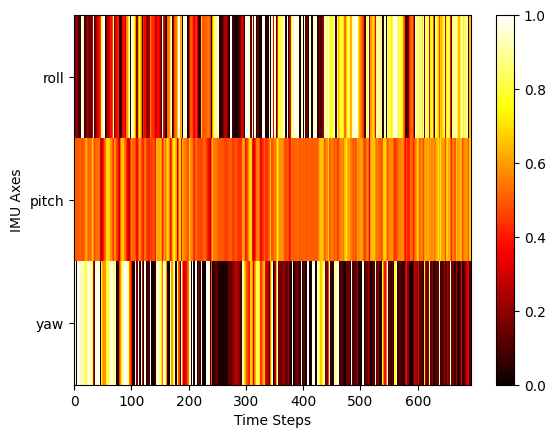

In [6]:
import glob
import torch
from torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
import pandas as pd

# 示例IMU数据（随机生成）
# 假设有100个时间步，每个时间步有3个维度的数据（例如X、Y、Z轴的加速度）
all_imu_path = sorted(glob.glob('/home/lyc/doc/AML_LAB/imu_data/*.csv'))

# 假设我们只读取第一个文件作为示例
# 如果你想处理多个文件，可以通过循环或其他方法来实现
example_path = all_imu_path[5]

# 读取CSV文件
imu_data_df = pd.read_csv(example_path)

# 将DataFrame转换为NumPy数组
# 假设CSV文件中每一列代表一个轴的数据，例如X、Y、Z轴
# imu_data = imu_data_df.values

# 如果你的CSV文件中包含非数据列（如时间戳），你需要在这里进行处理，例如：
imu_data = imu_data_df[['roll', 'pitch', 'yaw']].values
print(imu_data)
# 数据归一化（可选）
imu_data = (imu_data - np.min(imu_data)) / (np.max(imu_data) - np.min(imu_data))

# 生成热图
plt.imshow(imu_data.T, cmap='hot', interpolation='nearest', aspect='auto')
plt.colorbar()  # 显示颜色条

# 设置轴标签
plt.xlabel('Time Steps')
plt.ylabel('IMU Axes')
plt.yticks(ticks=range(imu_data.shape[1]), labels=['roll', 'pitch', 'yaw'])  # 使用列名作为Y轴标签

plt.show()